<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW4_MLP_Regression_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.1 Import Libraries and Read the Data from CSV

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
import tensorflow as tf

In [247]:
path = '/content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv'

data = pd.read_csv(path, delimiter=',')
# data1 = pd.read_csv(io.StringIO(data.to_csv(index=False)))

In [249]:
data.head()

,name,diameter,rot_per,Clustered3
0,Agathe,9.300,6.4840,4
1,Augusta,12.467,5.8949,1
2,Valda,14.645,17.3860,1
3,Lucretia,11.036,4.3480,1
4,Bruna,9.822,13.8070,3


# 1.2 Data Cleaning and Preparation

In [250]:
data.drop(['Clustered3'], axis=1, inplace=True)

In [251]:
data.shape

(3051, 3)

In [252]:
data.columns

Index(['name', 'diameter', 'rot_per'], dtype='object')

In [253]:
data.head()

,name,diameter,rot_per
0,Agathe,9.300,6.4840
1,Augusta,12.467,5.8949
2,Valda,14.645,17.3860
3,Lucretia,11.036,4.3480
4,Bruna,9.822,13.8070


In [ ]:
# data.round(1)

## Convert the diameter and rotation period data to Int

In [254]:
data['diameter'] = data['diameter'].astype(int) 
data['rot_per'] = data['rot_per'].astype(int) 

In [255]:
data.dtypes

name        object
diameter     int64
rot_per      int64
dtype: object

In [256]:
# data.to_numpy()
# data = tf.data.Dataset.from_tensor_slices((data.values))

In [257]:
# X = data.iloc[:,0:8].values
# y = data.iloc[:,:8].values

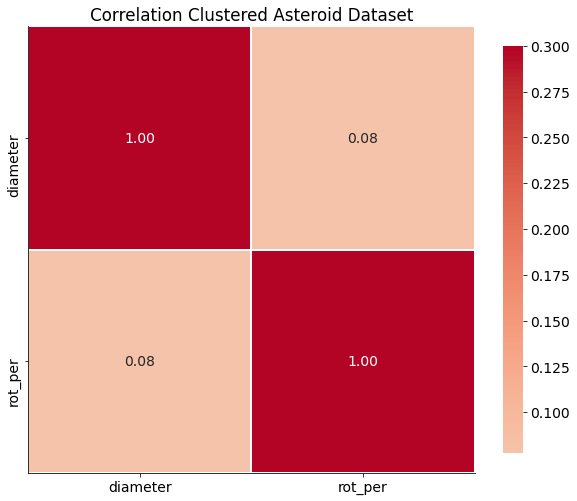

In [258]:
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,15)
plt.title('Correlation Clustered Asteroid Dataset')
plt.show()

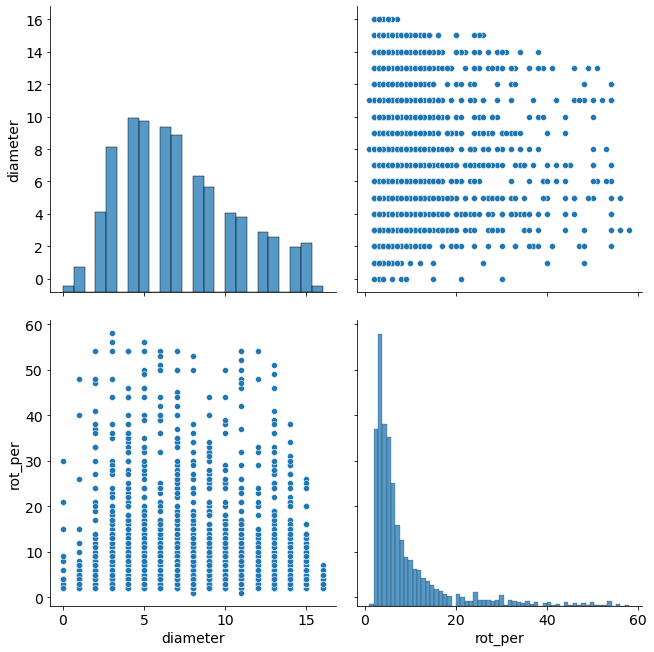

In [259]:
g = sns.pairplot(data, diag_kind="hist")
g.fig.set_size_inches(10,10)

# MLP Using Keras with No Clustered3 Label

In [260]:
X = data[['diameter', 'rot_per']]
y = data['name']

In [ ]:
X

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [262]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(data['name'])

In [263]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [264]:
# Load the data set and split for training and testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Epoch 1/100
306/306 [==============================] - 1s 1ms/step - loss: -582.2133 - accuracy: 0.0025
Epoch 2/100
306/306 [==============================] - 0s 1ms/step - loss: -7233.3245 - accuracy: 1.0540e-04
Epoch 3/100
306/306 [==============================] - 0s 1ms/step - loss: -29785.2196 - accuracy: 1.6300e-05
Epoch 4/100
306/306 [==============================] - 0s 1ms/step - loss: -92398.0600 - accuracy: 1.9020e-04
Epoch 5/100
306/306 [==============================] - 0s 1ms/step - loss: -202339.9486 - accuracy: 4.1693e-04
Epoch 6/100
306/306 [==============================] - 0s 1ms/step - loss: -369439.4049 - accuracy: 8.1100e-04
Epoch 7/100
306/306 [==============================] - 0s 1ms/step - loss: -593843.4376 - accuracy: 6.5492e-05
Epoch 8/100
306/306 [==============================] - 0s 1ms/step - loss: -879436.8106 - accuracy: 8.6904e-05
Epoch 9/100
306/306 [==============================] - 0s 1ms/step - loss: -1253286.4691 - accuracy: 2.9980e-04
Epoch 10/10

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [219]:
# y

array([  31,  183, 2787, ..., 2196,   34, 1561])

# Muller Loop Regression

In [293]:
from sklearn import metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [294]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor      mae           mse  Rsquared      accuracy
0  Nearest Neighbors   886.46  1.157088e+06     -0.51    -51.458834
1         Linear SVR   757.00  7.647219e+05     -0.00     -0.099421
2   Gaussian Process  1458.80  1.253452e+08   -163.07 -16307.247225
3      Decision Tree   803.28  9.202144e+05     -0.20    -20.452850
4      Random Forest   758.89  7.697120e+05     -0.01     -0.752612
5                MLP   756.02  7.634977e+05      0.00      0.060816
6           AdaBoost   760.53  7.701939e+05     -0.01     -0.815689
--------------------------------------------------------------------------------
Best --> Regression = MLP, Score (accuracy) = 0.06


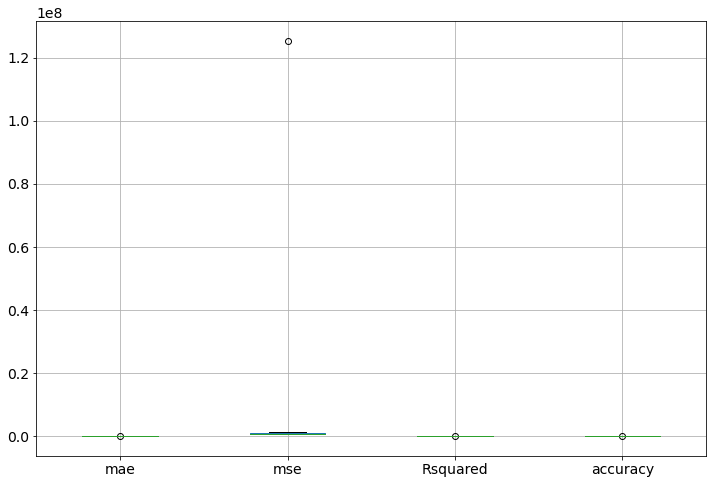

In [295]:
#plot the output of the various algorithms
output.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f887befd0>,
      dtype=object)

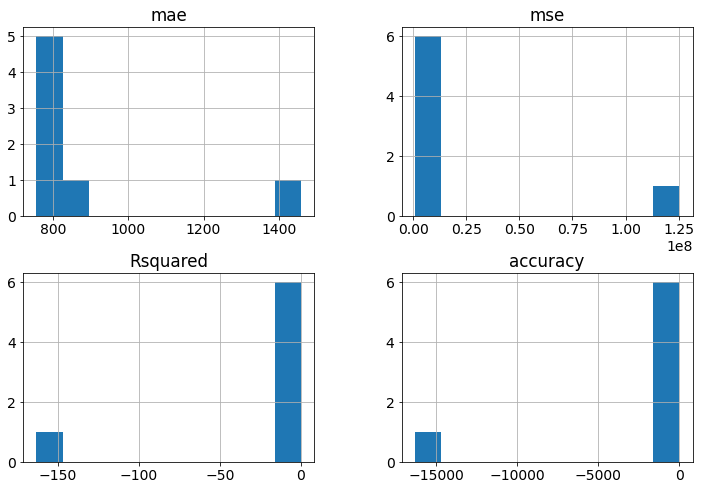

In [296]:
output.hist()

# MLP Using Keras With Clustered3 Label 

In [ ]:
X = data[['diameter', 'rot_per', 'Clustered3']]
y = data['name']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(data['name'])

In [ ]:
X

array([[ 0.54535303, -0.27638085,  1.27241419],
       [ 1.37853886, -0.38787602, -0.49863311],
       [ 1.93399608,  0.95006602, -0.49863311],
       ...,
       [-1.67647584, -0.16488568, -1.08898221],
       [-1.95420445,  1.3960467 ,  0.68206509],
       [-1.67647584,  0.72707568, -1.08898221]])

In [ ]:
y

array([  31,  183, 2787, ..., 2196,   34, 1561])

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
# Load the data set and split for training and testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Epoch 1/100
306/306 [==============================] - 1s 1ms/step - loss: -2862.8346 - accuracy: 6.6032e-04
Epoch 2/100
306/306 [==============================] - 0s 1ms/step - loss: -26376.6725 - accuracy: 5.0874e-04
Epoch 3/100
306/306 [==============================] - 0s 1ms/step - loss: -117684.6880 - accuracy: 1.7717e-04
Epoch 4/100
306/306 [==============================] - 0s 1ms/step - loss: -313865.6213 - accuracy: 1.2971e-04
Epoch 5/100
306/306 [==============================] - 0s 1ms/step - loss: -634617.8903 - accuracy: 1.6640e-04
Epoch 6/100
306/306 [==============================] - 0s 1ms/step - loss: -1113665.7345 - accuracy: 1.1875e-05
Epoch 7/100
306/306 [==============================] - 0s 1ms/step - loss: -1751464.3388 - accuracy: 2.0776e-04
Epoch 8/100
306/306 [==============================] - 0s 1ms/step - loss: -2538858.5684 - accuracy: 7.2212e-04
Epoch 9/100
306/306 [==============================] - 0s 1ms/step - loss: -3578299.0480 - accuracy: 3.1897e-04


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Muller Loop Classification


In [297]:
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", 
         "Naive Bayes"# "QDA"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]
    # QuadraticDiscriminantAnalysis()]

In [298]:
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    # print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 0.00,
Classifier = Linear SVM, Score (test, accuracy) = 0.00,
Classifier = RBF SVM, Score (test, accuracy) = 0.00,
Classifier = Decision Tree, Score (test, accuracy) = 0.00,
Classifier = Random Forest, Score (test, accuracy) = 0.00,
Classifier = Neural Net, Score (test, accuracy) = 0.00,
Classifier = AdaBoost, Score (test, accuracy) = 0.00,
Classifier = Naive Bayes, Score (test, accuracy) = 0.00,
--------------------------------------------------------------------------------
Best --> Classifier = , Score (test, accuracy) = 0.00


# Applying the Decision tree Regressor

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# y

In [173]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

**Evaluating the model performance**

In [174]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  942369.19
MAE :  823.13
RSquared :  -0.2


# Applying the SVR

In [ ]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)

**Evaluation of the SVR Performance**

In [ ]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  789044.93
MAE :  771.29
RSquared :  -0.0


# Applying the KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(X_train,y_train)

y_pred = knr.predict(X_test)

**Evaluation of the K-NN Regressor Performance**

In [ ]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  963360.44
MAE :  818.46
RSquared :  -0.22


# Applying the Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

**Evaluation of the Linear Regressor Performance**

In [ ]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  797103.8
MAE :  773.85
RSquared :  -0.01


# Applying the Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

lor = LogisticRegression(max_iter=1000)

lor.fit(X_train,y_train)

y_pred = lor.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  1539645.08
MAE :  1009.16
RSquared :  -0.96


**Evaluation of the Logistics Regressor Performance**

# Applying the MLP Regressor

In [ ]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  1539645.08
MAE :  1009.16
RSquared :  -0.96


# Applying the Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  924078.45
MAE :  811.37
RSquared :  -0.17
